In [1]:
using LaTeXStrings
using PyPlot
using Polynomials





ArgumentError: ArgumentError: Package Polynomials not found in current path:
- Run `Pkg.add("Polynomials")` to install the Polynomials package.


## Propagación de errores en sistemas dinámicos discretos. 

 
                          U.N.A.M.  
    
                    Propagación de errores.
        
            Temas Selectos de Física Computacional
             
 Integrantes:
  - Gerardo Gustavo Ramírez Ruiz
  - José Samuel Rodríguez Olguín
                                                      2018


El cálculo numérico tiene sus bases en la representación de los números en una computadora, por lo que vale la pena entender como las operaciones aritméticas impactan en esa representación.

 - En Julio de 1992, un intento de interceptar un misil Scud falló debido a que el sistema interno era incapaz de representar $1/10$ de manera precisa, lo que resultó en $28$ muertes. En última instancia, un error de redondeo de solo $9.5 \times 10^{-8}$ acumulado fue lo suficientemente grande para que el misil Patriot perdiera por completo su objetivo en aproximadamente $0.3$ s.

En las diversas disciplinas científicas estos tipos de errores pueden impactar en los resultados. Dentro de un contexto matemático, pueden surgir en la evaluación de una función, soluciones de ecuaciones lineales y no lineales, así como en la solución de ecuaciones diferenciales.

Otra de las motivaciones para estudiar esta propagación de errores fue la fiabilidad de los métodos numéricos para calcular trayectorias de sistemas caóticos continuos. En la imagen se muestran las trayectorias que deberían ser una de un pendulo doble, pues una es la integración hacia adelante en el tiempo, y la otra es hacia atrás, con el método de Verlet. Este método acota los errores para sistemas periódicos, sin embargo, para la mayoría de condiciones iniciales, el péndulo doble es un sistema caótico.
![caption](PenduloDoble.jpg)

## Tipos de errores:

- Aleatorio.
Es aquel error inevitable que se produce por eventos únicos imposibles de controlar durante el proceso de medición.
- Gaussiano.
Guarda una conexión entre la "Teoría de probabilidades" y la "Teoría del error".
- Sistemático.
Es aquel que se produce de igual modo en todas las mediciones que se realizan de una magnitud


## Error de truncamiento y redondeo.

- Redondeo: Surgen del almacenamiento de números para un número fijo de cifras significativas o decimales.





- Truncamiento: Resulta de las diversas formas en que un proceso numérico puede ser cortado o "truncado".

Sistema de punto flotante IEEE. Nos ayuda a conocer las cotas que hay en los errores de redondeo y estimarlos.

Ejemplo: Consideremos la serie $\sum_{n=1}^{\infty}(\frac{1}{2})^n= \frac{1}{2} + \frac{1}{4} + \frac{1}{8}$ 

Obtenemos $0.875$ con un error de truncamiento de $(\frac{1}{2})^3 = 0.125.$

Punto flotante.


$             x = \frac{1}{n} \ \ \ \ \      \ \ \ \ \    x = (n+1)x -1$

In [2]:
println("n","|   ","x=1/n","|                 ", "k=1,...,10", "|         ","k=1,...,30")

a= []
b=Float64[]
c=Float64[]
N=Float64[]
x1=[]
y1=[]
y2=[]
krange=1:1:30

for n in 1:10
    x = 1/n
    for k in krange
       x = (n + 1) * x - 1
        if(k<=10)
       push!(b,x)

            elseif(k <= krange[end])
        push!(c,x)
        end
    push!(a,n)
    push!(N,1/n)
    end
    push!(x1,a[end])
    push!(y1,b[end])
    push!(y2,c[end])
    println(a[end], "|      ",N[end], "|           ", b[end], "|         ",c[end])
end



n|   x=1/n|                 k=1,...,10|         k=1,...,30
1|      1.0|           1.0|         1.0
2|      0.5|           0.5|         0.5
3|      0.3333333333333333|           0.3333333333139308|         -21.0
4|      0.25|           0.25|         0.25
5|      0.2|           0.20000000179015842|         6.545103021815777e6
6|      0.16666666666666666|           0.16666666069313285|         -4.766418007969146e8
7|      0.14285714285714285|           0.1428571343421936|         -9.817068105e9
8|      0.125|           0.125|         0.125
9|      0.1111111111111111|           0.11111116045435665|         4.934324553889695e12
10|      0.1|           0.10000020942782539|         1.4089256847173925e14


Una inspección más cercana  muestra que los valores que permanecen fijos son aquellos donde $n$ es una potencia de $2$. Esto tiene sentido ya que dichos números tienen una representación exacta en el sistema binario de punto flotante. Para todos los demás hay algun error inicial en la representación, la propagación del error conforme aumenta el número de iteraciones resulta en un enorme error.

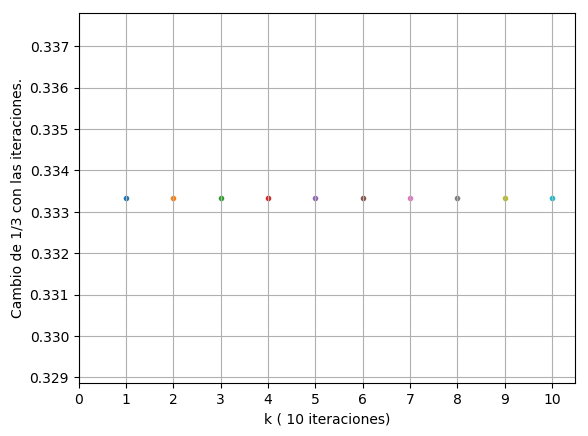

C:\Users\samy_\.julia\conda\3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\samy_\.julia\conda\3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


In [3]:
using PyPlot
krange=1:1:10

n=3
    x = 1/n
    for k in krange
       x = (n + 1) * x - 1
      scatter(k,trunc(x,digits=10),s=9)
    end


xticks(0:1:10)
xlabel("k ( 10 iteraciones)")
grid("true")
ylabel("Cambio de 1/3 con las iteraciones.")
show()

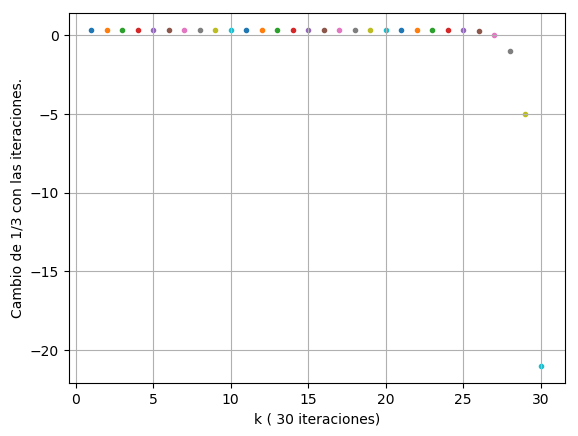

In [4]:

b=[]

N=[]

krange=1:1:30

n=3
    x = 1/n
    for k in krange
       x = (n + 1) * x - 1
      
       scatter(k,x,s=9)
    end


plot(N,b)
xticks(0:5:30)
grid("true")
xlabel("k ( 30 iteraciones)")
ylabel("Cambio de 1/3 con las iteraciones.")
show()

La pendiente de esta recta es:


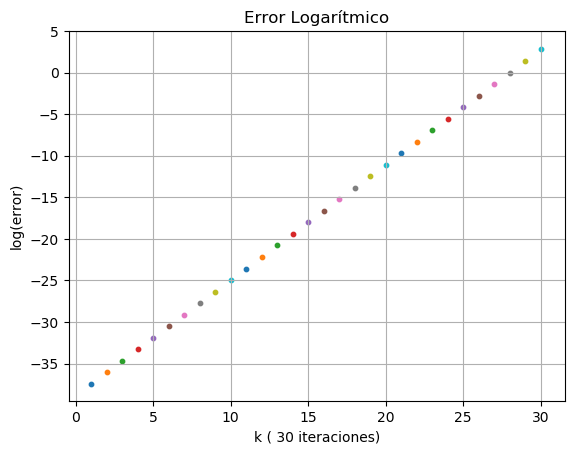

1.3862943611198906

In [5]:
krange=1:1:30

n=3
x = 1/n
logerr=0
logerr1=0
    for k in krange
        x0=copy(x)
        x = (n + 1) * x - 1
        err=abs(x-x0)
        logerr1=copy(logerr)
        logerr=log(err)
       scatter(k,logerr,s=10)    
       #println(BigFloat(x))
    end

pendiente=logerr-logerr1
println("La pendiente de esta recta es:")
print(pendiente)
grid("true")
xlabel("k ( 30 iteraciones)")
ylabel("log(error)")
title("Error Logarítmico")
show()

De acuerdo con esto, los resultados para $n=10$ iteraciones aparecen conforme a los resultados esperados de $x=1/n$; sin embargo, la tercera columna ya muestra que varios de estos valores están contaminados con errores. Para la tercera columna con $n=30$ iteraciones muchos de los valores ni siquiera se reconocen como $1/n$.

Por lo que $x=1/3$ se va a ver afectado por la forma en que la computadora lo representa por medio del sistema de punto flotante, $x=1/3 + \delta$.


Después de una iteración:

  $ x= (n+1)x -1 = 4(\frac{1}{3} + \delta)=\frac{1}{3} + 4 \delta $
   
   El error será amplificado por un factor de 4.
   
La gráfica del error logarítmico muestra que por cada iterado el error se amplifica $*10^{(-1.3862943611198906iteraciones)}$


Veamos que tal se propaga el error cuando se utiliza "BigFloat" en su lugar:

In [6]:
BigFloat(0.1)

1.000000000000000055511151231257827021181583404541015625e-01

3.333333333333333333333333333333333333333333333333333333333333333333333333333391e-01
3.333333333333333333333333333333333333333333333333333333333333333333333333333564e-01
3.333333333333333333333333333333333333333333333333333333333333333333333333334255e-01

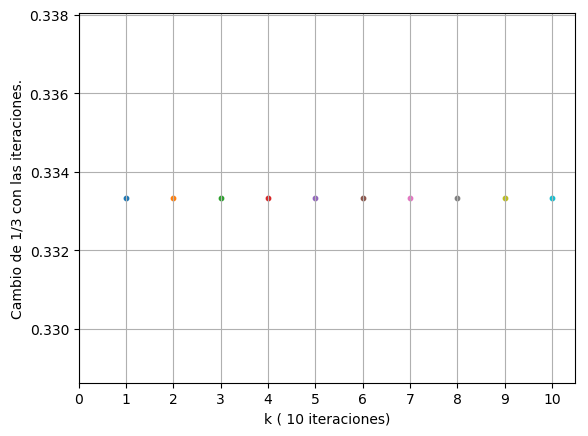


3.333333333333333333333333333333333333333333333333333333333333333333333333337018e-01
3.333333333333333333333333333333333333333333333333333333333333333333333333348072e-01
3.33333333333333333333333333333333333333333333333333333333333333333333333339229e-01
3.333333333333333333333333333333333333333333333333333333333333333333333333569158e-01
3.333333333333333333333333333333333333333333333333333333333333333333333334276633e-01
3.333333333333333333333333333333333333333333333333333333333333333333333337106533e-01
3.333333333333333333333333333333333333333333333333333333333333333333333348426132e-01


In [7]:
krange=1:1:10

n=3
    x = BigFloat(1//n)
    for k in krange
       x = (n + 1) * x - 1
     scatter(k,Float64(x),s=10)
     println(BigFloat(x))
    end

x10=x

xticks(0:1:10)
grid("true")
xlabel("k ( 10 iteraciones)")
ylabel("Cambio de 1/3 con las iteraciones.")
show()

Error relativo entre k=0 y k=10:

In [8]:
#Error relativo:

Er= abs((BigFloat(1//n)-x10)/(BigFloat(1//n)))

4.527835221329078636532246952267964490141480041069386876650614933116015575000521e-72

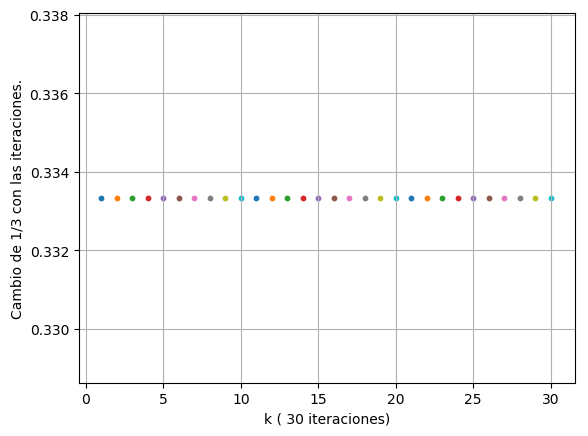

In [9]:
krange=1:1:30

n=3
    x = BigFloat(1//n)
    for k in krange
       x = (n + 1) * x - 1
       scatter(k,Float64(x),s=10)    
       #println(BigFloat(x))
    end

x30=x
#xticks(0:2.5:30)
#yticks(0.5:-1:-22)
grid("true")
xlabel("k ( 30 iteraciones)")
ylabel("Cambio de 1/3 con las iteraciones.")
show()

In [10]:
#Error relativo:

Er= abs((BigFloat(1//n)-x30)/(BigFloat(1//n)))

4.978412222288913361397166965476877079779025803576733920922893109613618374716455e-60

Error relativo entre k=0 y k=30:

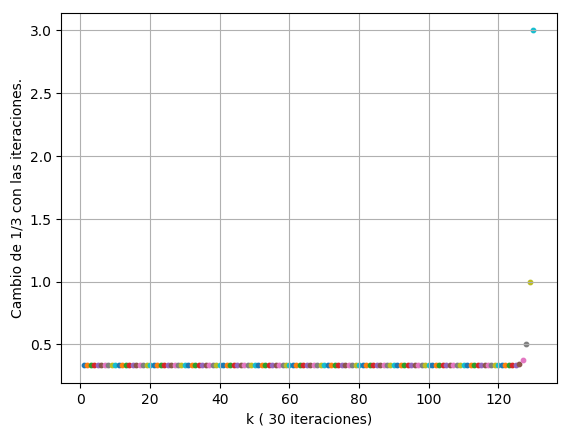

In [11]:
krange=1:1:130

n=3
    x = BigFloat(1//n)
    for k in krange
       x = (n + 1) * x - 1
       scatter(k,Float64(x),s=10)    
       #println(BigFloat(x))
    end

#xticks(0:2.5:30)
#yticks(0.5:-1:-22)
grid("true")
xlabel("k ( 30 iteraciones)")
ylabel("Cambio de 1/3 con las iteraciones.")
show()

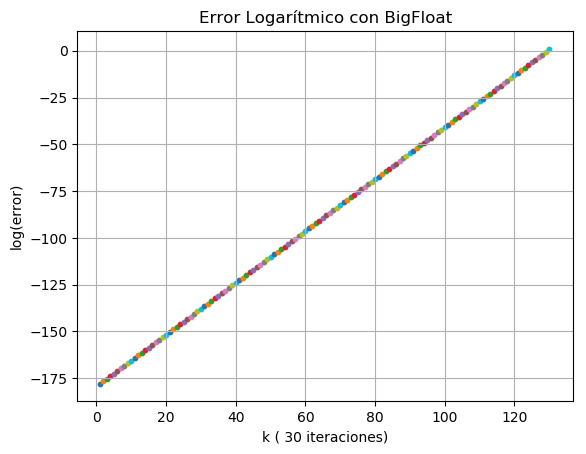

La pendiente de esta recta es:
-1.386294361119890618834464242916353136151000268720510508241360018986787243939391

In [12]:
krange=1:1:130

n=3
x = BigFloat(1//n)
logerr=0
logerr1=0
    for k in krange
        x0=copy(x)
       x = (n + 1) * x - 1
        err=abs(x-x0)
            logerr1=copy(logerr)
        logerr=log(err)
       scatter(k,Float64(logerr),s=10)    
       #println(BigFloat(x))
    end

pendiente=logerr-logerr1
grid("true")
xlabel("k ( 30 iteraciones)")
ylabel("log(error)")
title("Error Logarítmico con BigFloat")
pendiente=logerr1-logerr
println("La pendiente de esta recta es:")
print(pendiente)
show()

Vemos que el error se propaga de la misma manera que con Float64, sin embargo, el error inicial es mucho menor; por lo que en un principio usar más dígitos nos permitió tener un intervalo inicial de confianza mayor.

 ## ¿Cómo se propaga el error en sistemas dinámicos unidimensionales discretos?
 Condicionamiento del problema.

Esta noción está basada en la idea de que pequeños cambios en la entrada deben llevar a pequeños cambios en la salida.

Ejemplo:
         - La familia cuadrática con $c < -1.75$.
         
         - Polinomios de Wilkinson.
               
$W(x) = (x-1)(x-2)...(x-20)$

$W(x) = x^{20} -210x^{19} +20615x^{18} - ...$




In [13]:
poly([1,2])

UndefVarError: UndefVarError: poly not defined

In [14]:
Poly([2,-3,1])

UndefVarError: UndefVarError: Poly not defined

In [15]:
polyval(poly([1,2]), 2)

UndefVarError: UndefVarError: poly not defined

Si el coeficiente $a_{1} = -3$ se cambia por tan solo $2^{-22}$, entonces: 

In [16]:
-3-2^-22

-3.000000238418579

In [17]:
polyval(Poly([2,-3.000000238418579,1]), 2)

UndefVarError: UndefVarError: Poly not defined

In [18]:
roots(poly([1,2]))


UndefVarError: UndefVarError: poly not defined

In [19]:
roots(Poly([2,-3.000000238418579,1]))

UndefVarError: UndefVarError: Poly not defined

Si el coeficiente $x^{1}$ es disminuido de $-3$ por $2^{-22}$ a $-3.000000238418579$, entonces el valor del polinomio W(2) decrece de 0 a $-4.76837158203125 \times 10^{-7}$ y la raiz crece de $x = 2.0$ a $x \approx 2.0000004768370445$.


Para W(x) = (x - 1)...(x - 20)

Se encontró que al hacer lo mismo solo para el coeficiente $x^{19}=-210$, la raíz $x=20$ creció a un valor de $x \approx 20.8$.

In [20]:
"""
    iteramapeo(f, x0, n)

Esta función itera el mapeo `f`, usando como condición inicial `x0`, `n::Int` veces
y regresa dos vectores que continen la secuencia de puntos, incluyendo las
*visitas* a la diagonal.
"""
function iteramapeo(f, x0, n::Int)
    xx = [x0]
    fx = [0.0]
    for it = 1:n
        x1 = f(x0)
        push!(xx, x0)
        push!(fx, x1)
        x0 = x1
        push!(xx, x1)
        push!(fx, x1)
    end
    xx, fx
end

iteramapeo

In [21]:
#"Módulo" Diferenciación Automática
import Base: +, -, *, /, ^
import Base.show
import Base: sqrt, exp, log, sin, cos, sinh, cosh

"""
    Dual

Definición de los números duales. Los campos internos son
    x  :: Float64   # valor de la función
    x′ :: Float64   # valor de su derivada

"""
struct Dual
    x  :: Float64
    x′ :: Float64
end

Dual(c::Real) = Dual(c, 0.0)
dual(x0::Real) = Dual(x0, 1.0)

+(u::Dual, v::Dual) = Dual( u.x + v.x, u.x′ + v.x′)

-(u::Dual, v::Dual) = Dual( u.x - v.x, u.x′ - v.x′)

*(u::Dual, v::Dual) = Dual( u.x * v.x, u.x * v.x′ + u.x′ * v.x)

function /(u::Dual, v::Dual)
    y = u.x / v.x
    Dual( y, (u.x′ - y * v.x′)/v.x )
end

function ^(a::Dual, n::Int)
    y = a.x^(n-1)
    Dual(a.x * y, n*y*a.x′)
end

#+
+(a::Real, u::Dual) = Dual( a + u.x, u.x′)
+(u::Dual, a::Real) = Dual( a + u.x, u.x′)
#-
-(a::Real, u::Dual) = Dual( a - u.x, -u.x′)
-(u::Dual, a::Real) = Dual( u.x - a, u.x′)
#*
*(a::Real, u::Dual) = Dual(u.x*a,u.x′*a)
*(u::Dual, a::Real) = Dual(u.x*a,u.x′*a)
#/
function /(a::Real,u::Dual)
    y = a / u.x
    Dual( y, (-y * u.x′)/u.x )
end
/(u::Dual, a::Real)=Dual( u.x/a, u.x′/a )

function show(u::Dual)
    print(string(u.x)*" + "*string(u.x′)*"ε")
end

sqrt(u::Dual)=Dual(sqrt(u.x),u.x′/(2*sqrt(u.x)))
exp(u::Dual)=Dual(exp(u.x),u.x′*exp(u.x))
log(u::Dual)=Dual(log(u.x),u.x′/u.x)
sin(u::Dual)=Dual(sin(u.x),u.x′*cos(u.x))
cos(u::Dual)=Dual(cos(u.x),-u.x′*sin(u.x))
sinh(u::Dual)=Dual(sinh(u.x),u.x′*cosh(u.x))
cosh(u::Dual)=Dual(cosh(u.x),u.x′*sinh(u.x))

"Método de Newton con Duales a partir de una función real f y un valor inicial x0."
function newton(f,x0,tol=1e-15)
    fprime(x)=f(dual(x)).x′
    xn=x0
    while abs(f(xn))>tol
        xn=xn-f(xn)/fprime(xn)
    end
    return xn
end

"A partir de una función real f, y un rango x0, devuelven las raíces encontradas"
function soluciones(f,x0)
    raiz=[]
    raices=[]
    for i in x0
        r=newton(f,i)
        if abs(r)≠Inf
            push!(raiz,r)
        end
    end
    push!(raices,raiz[1])
    for i in 1:size(raiz,1)-1
        if abs(raiz[i]-raiz[i+1])>1e-10
            a=true
            b=true
            for j in raices
                if abs(raiz[i+1]-j)>1e-10
                    a=true
                else
                    a=false
                b=(a & b)
                end
            end
            if b==true
                push!(raices,raiz[i+1])
            end
        end
    end
    return raices
end

soluciones

In [22]:
"""
    ciclosestables!(xx, f, cc, nit, nout)

Esta función itera el mapeo `f`, de una variable, `nit+nout` veces, 
usando como condición inicial `x0=0`; los últimos `nout` iterados 
actualizan al vector `xx` que tiene longitud `nout`. `cc` es el valor
del parámetro del mapeo `f`. El mapeo `f` debe ser definido de 
tal manera que `f(x0, cc)` tenga sentido. La idea es que los últimos 
`nout` iterados reflejen los ciclos estables del mapeo `f`.
"""
function ciclosestables!(xx, f, cc, nit, nout)
    @assert (nit > 0) && (nout > 0)
    
    x0=0.01
    # Primeros nit iterados
    for it = 1:nit
        x0 = f(x0, cc)
    end
    
    # Se guardan los siguientes nout iterados
    for it = 1:nout
        x0 = f(x0, cc)
        @inbounds xx[it] = x0
    end
    
    nothing
end

"""
    diag_bifurc(f, nit, nout, crange)

Itera el mapeo `f` `nit+nout` veces y regresa una matriz
cuya columna `i` tiene los últimos `nout` iterados del mapeo
para el valor del parámetro del mapeo `crange[i]`.

La función `f` debe ser definida de tal manera que `f(x0, c)` 
tenga sentido.
"""
function diag_bifurc(f, nit, nout, crange)
#     xx = Vector{Float64}(nout)
    ff = Array{Float64,2}(nout, length(crange))
    
    for ic in eachindex(crange)
        c = crange[ic]
        ciclosestables!(view(ff, :, ic), f, c, nit, nout)
#         ff[:,ic] = xx
    end
    
    return ff
end

diag_bifurc

### Mapeo Cuádrático

In [23]:
"""Esta función nos permite obtener el diagrama de Lyapunov de manera numérica en términos de c para la función Q(x,c)=x^2+c con
c en el intervalo [-2,0.25]."""

function Lyapunov(f::Function,fp::Function,x0,iteraciones)
domc=0.25:-1/2^10:-2.0
L=Float64[] #es mejor si se define como i=Float64[] 
c_valores=Float64[]
    

for j in domc
for _ in 1:100
      xn1=f(x0,j)
       x0=xn1
    end
 λ=0
 for k in 1:iteraciones
    xn1=f(x0,j)
    λ += log(abs(fp(xn1,j)))/iteraciones
    x0=xn1

 end
    push!(L,λ)
    push!(c_valores,j)
end


plot(c_valores,L,)
xticks(-2:0.25:0.25)
xlabel("c")
ylabel("λ")
grid("True")
end



"""Esta función nos permite obtener el diagrama de Lyapunov de manera numérica en términos de c para la función Q(x,c)=x^2+c con
c en el intervalo [-2,2]."""
function Lyapunov1(f::Function,x0,iteraciones,domc)
    L=Float64[] 
    c_valores=Float64[]
    
    for j in domc
        λ=0
        fc(x)=f(x,j)
        
        for _ in 1:100
            x0=fc(x0)
        end  
        for k in 1:iteraciones
            x=fc(dual(x0))
            λ += (log(abs(x.x′))/(iteraciones+100))
            x0=fc(x0)
        end
        push!(L,λ)
        push!(c_valores,j)
    end
    return c_valores,L
end

┌ Warning: Deprecated syntax `multiple line breaks between doc string and object`.
│ Use `at most one line break` instead.
└ @ nothing none:4


Lyapunov1

Diagrama de bifurcación original:

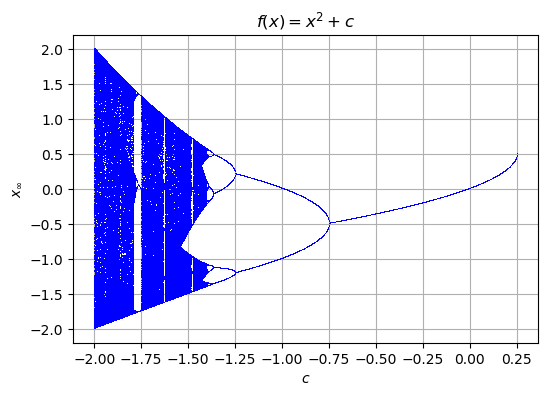

┌ Warning: `Array{T, 2}(m::Int, n::Int) where T` is deprecated, use `Array{T, 2}(undef, m, n)` instead.
│   caller = diag_bifurc(::Function, ::Int64, ::Int64, ::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}) at In[22]:41
└ @ Main .\In[22]:41


In [24]:
Qc(x,c) = x^2 + c

crange = 0.25:-1/2^10:-2.0

ff = diag_bifurc(Qc, 100000, 256, crange); 
cc = ones(size(ff, 1)) * crange';

# Esto cambia las matrices en vectores; ayuda un poco para los dibujos
ff = reshape(ff, size(ff, 1)*size(ff, 2));
cc = reshape(cc, size(ff));
figure(figsize=(6,4))
plot(cc, ff, "b,")
grid("on")
xticks(-2:0.25:0.25)
xlabel(L"c")
ylabel(L"x_\infty")
title(L"f(x)=x^2+c")
show()

Acercamiento de las órbitas en el rango de $c$ para distintos números de iteraciones iniciales:

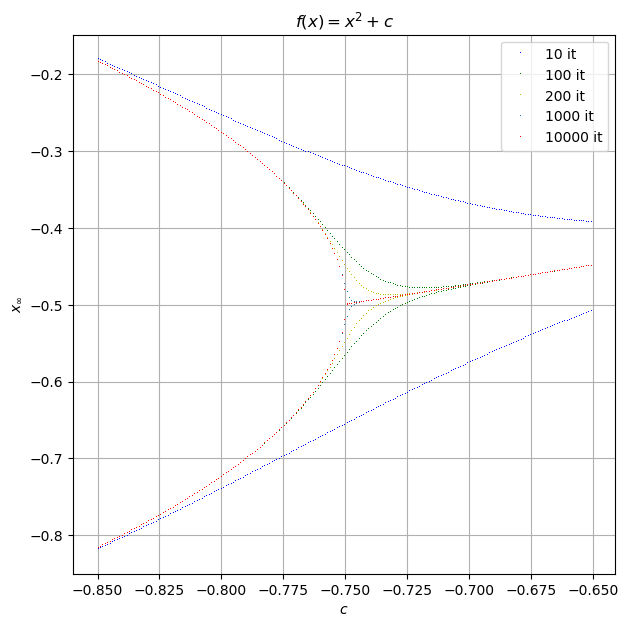

In [25]:
Qc(x,c) = x^2 + c

crange = -0.85:1/2^10:-0.65
ff = diag_bifurc(Qc, 10, 2, crange); 
ff1= diag_bifurc(Qc, 100, 2, crange);
ff2= diag_bifurc(Qc, 200, 2, crange);
ff3= diag_bifurc(Qc, 1000, 2, crange);
ff4= diag_bifurc(Qc, 10000, 2, crange);

cc = ones(size(ff, 1)) * crange';

# Esto cambia las matrices en vectores; ayuda un poco para los dibujos
ff = reshape(ff, size(ff, 1)*size(ff, 2));
ff1 = reshape(ff1, size(ff1, 1)*size(ff1, 2));
ff2 = reshape(ff2, size(ff2, 1)*size(ff2, 2));
ff3 = reshape(ff3, size(ff3, 1)*size(ff3, 2));
ff4 = reshape(ff4, size(ff4, 1)*size(ff4, 2));


cc = reshape(cc, size(ff));

figure(figsize=(7,7))
plot(cc,ff,"b,", label="10 it")
plot(cc,ff1,"g,", label="100 it")
plot(cc,ff2, "y,", label="200 it")
plot(cc,ff3, ",",label="1000 it")
plot(cc,ff4, "r,",label="10000 it")

grid("True")
xticks(-0.85:0.025:-0.65)
legend(loc=1)
xlabel(L"c")
ylabel(L"x_\infty")
title(L"f(x)=x^2+c")
show()

In [26]:


function Eᵣ(it_entrada,it_salida)
b =[]  
 for i in 1:1:length(crange)
    p = abs((diag_bifurc(Qc, it_entrada, it_salida, crange)[it_salida,i] - diag_bifurc(Qc, 1000000, it_salida, crange)[it_salida,i])/ diag_bifurc(Qc, 1000000, it_salida, crange)[it_salida,i])*100
    push!(b,p)
 end
plot(crange,b)
    
end

Eᵣ (generic function with 1 method)

Para $10$ iteraciones iniciales:

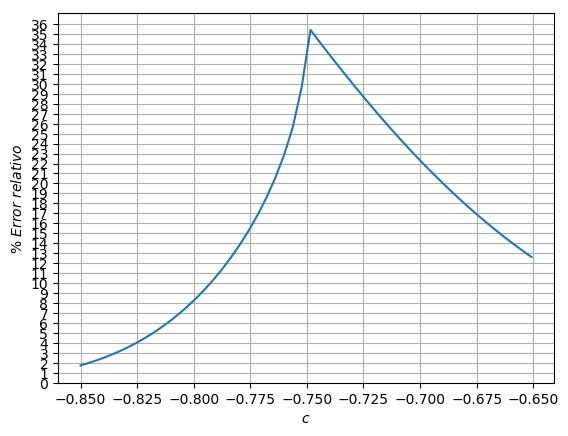

Se tiene un Eᵣ ≈ 33 %


In [27]:
println("Se tiene un Eᵣ ≈ 33 %")
        
Qc(x,c) = x^2 + c
crange = -0.85:1/2^8:-0.65    

Eᵣ(10,2)

grid("True")
yticks(0:1:36)
xlabel(L"c")
ylabel(L"\% \ Error \ relativo ")
show()

Para $100$ iteraciones iniciales:

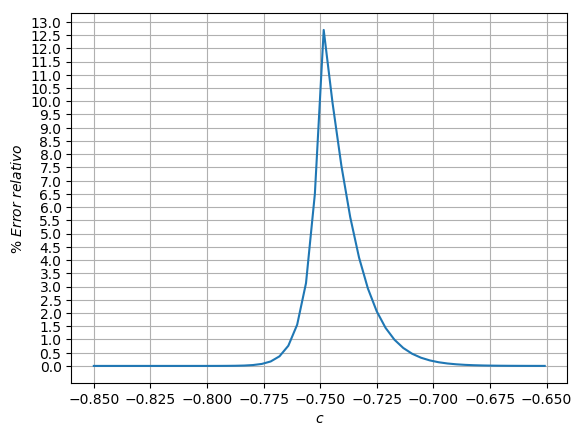

Se tiene un Eᵣ ≈ 9.5 %


In [28]:
println("Se tiene un Eᵣ ≈ 9.5 %")
        
Qc(x,c) = x^2 + c
crange = -0.85:1/2^8:-0.65    

Eᵣ(100,2)

grid("True")
yticks(0:0.5:13)
xlabel(L"c")
ylabel(L"\% \ Error \ relativo ")
show()

Para $200$ iteraciones iniciales:

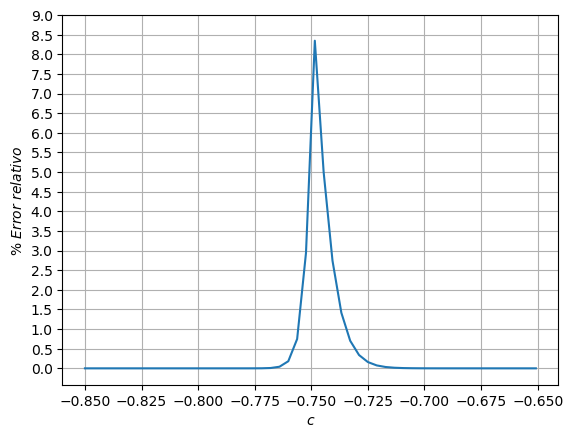

Se tiene un Eᵣ ≈ 5.5 %


In [29]:
println("Se tiene un Eᵣ ≈ 5.5 %")
        
Qc(x,c) = x^2 + c
crange = -0.85:1/2^8:-0.65    

Eᵣ(200,2)

grid("True")
yticks(0:0.5:9)
xlabel(L"c")
ylabel(L"\% \ Error \ relativo ")
show()

Para $1000$ iteraciones iniciales:

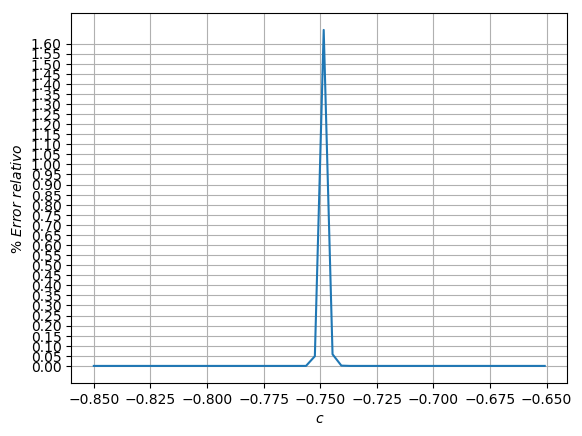

Se tiene un Eᵣ ≈ 0.75 %


In [30]:
println("Se tiene un Eᵣ ≈ 0.75 %")
        
Qc(x,c) = x^2 + c
crange = -0.85:1/2^8:-0.65    

Eᵣ(1000,2)

grid("True")
yticks(0:0.05:1.60)
xlabel(L"c")
ylabel(L"\% \ Error \ relativo ")
show()

Para $10000$ iteraciones iniciales:

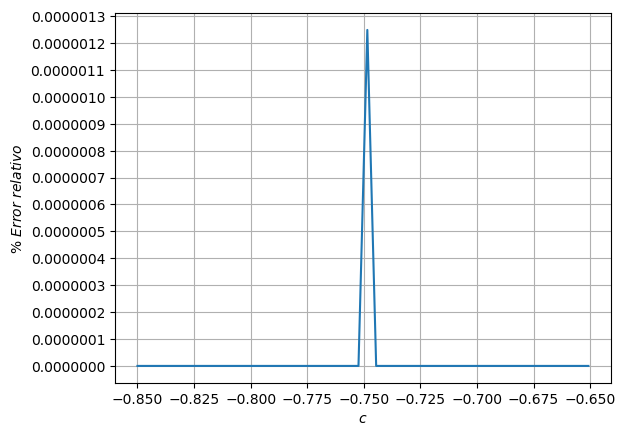

Se tiene un Eᵣ ≈ 0.0000006 %


In [31]:
println("Se tiene un Eᵣ ≈ 0.0000006 %")
        
Qc(x,c) = x^2 + c
crange = -0.85:1/2^8:-0.65    

Eᵣ(10000,2)

grid("True")
yticks(0:0.0000001:0.0000013)
xlabel(L"c")
ylabel(L"\% \ Error \ relativo ")
show()

Veamos entonces la relación de como se va mitigando la propagación del error en la convergencia conforme aumenta el número de iteraciones iniciales:

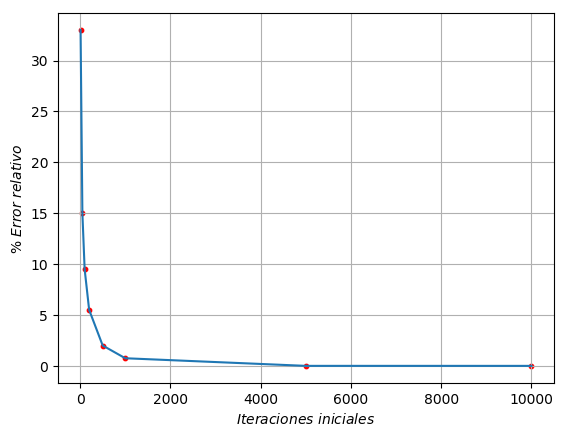

In [32]:
x=[10,50,100,200,500,1000,5000,10000]
y=[33,15,9.5,5.5,2,0.75,0.0015,0.0000006]

scatter(x,y,s=10, c="r")
plot(x,y)#,linewidth=2)

grid("True")

xlabel(L"Iteraciones \ iniciales")
ylabel(L"\% \ Error \ relativo ")  
show()

De la gráfica anterior podemos darnos cuenta de que el error disminuye como $e^{\frac{1}{x}}$, lo que significa que se propaga de manera exponencial ($e^x$).

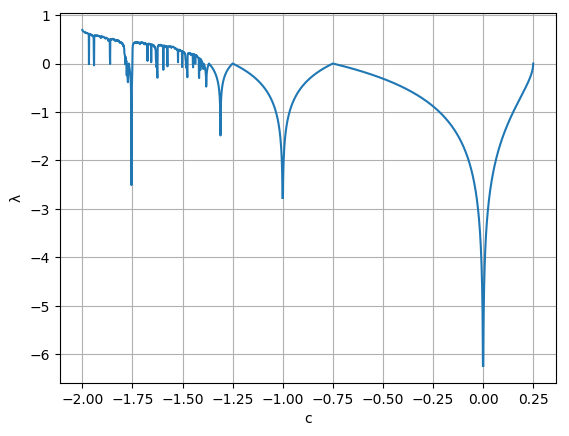

In [33]:
#Exponentes de Lyapunov de mapeo original
Qc(x,c) = x^2 + c 
dQ(x,c) = 2*x
Lyapunov(Qc,dQ,0.1,100000)
show()

Se podría comparar con otro mapeo que presente una dinámica similar o simplemente en los puntos de doblamiento de periodo de otro mapeo. Con comparar con el modo en que se está propagando el error en por ejemplo otro punto de bifurcación de este mismo mapeo.
Y además comparar en como es la propagación del error de la convergencia en estos puntos cuando se añade un error sistemático o un error aleatorio

En otro punto donde ocurre doblamiento de periodo: $c = -1.25$, en este caso es de periodo dos.

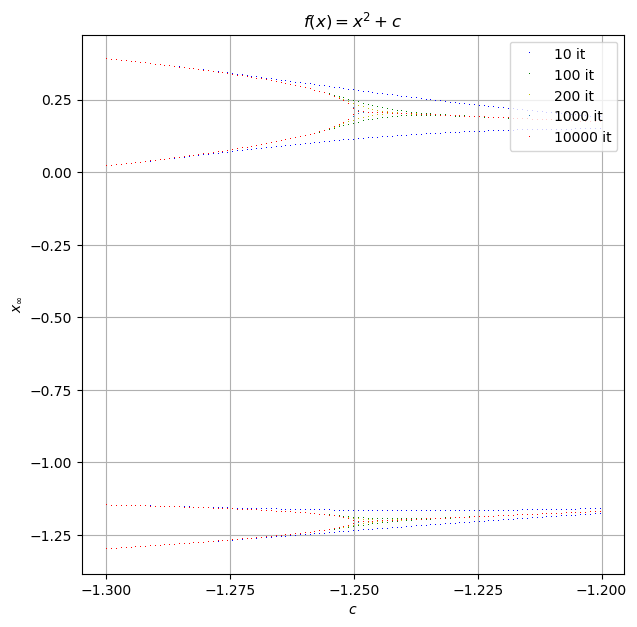

In [34]:
Qc(x,c) = x^2 + c

crange = -1.30:1/2^10:-1.20
ff = diag_bifurc(Qc, 10, 4, crange); 
ff1= diag_bifurc(Qc, 100, 4, crange);
ff2= diag_bifurc(Qc, 200, 4, crange);
ff3= diag_bifurc(Qc, 1000, 4, crange);
ff4= diag_bifurc(Qc, 10000, 4, crange);

cc = ones(size(ff, 1)) * crange';

# Esto cambia las matrices en vectores; ayuda un poco para los dibujos
ff = reshape(ff, size(ff, 1)*size(ff, 2));
ff1 = reshape(ff1, size(ff1, 1)*size(ff1, 2));
ff2 = reshape(ff2, size(ff2, 1)*size(ff2, 2));
ff3 = reshape(ff3, size(ff3, 1)*size(ff3, 2));
ff4 = reshape(ff4, size(ff4, 1)*size(ff4, 2));


cc = reshape(cc, size(ff));

figure(figsize=(7,7))
plot(cc,ff,"b,", label="10 it")
plot(cc,ff1,"g,", label="100 it")
plot(cc,ff2, "y,", label="200 it")
plot(cc,ff3, ",",label="1000 it")
plot(cc,ff4, "r,",label="10000 it")

grid("True")
xticks(-1.30:0.025:-1.20)
legend(loc=1)
xlabel(L"c")
ylabel(L"x_\infty")
title(L"f(x)=x^2+c")
show()

Bifurcación superior:

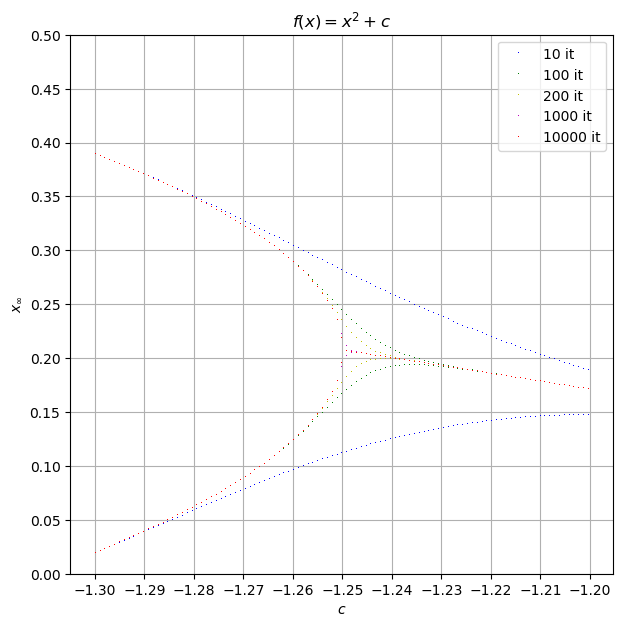

In [35]:
Qc(x,c) = x^2 + c

crange = -1.30:1/2^10:-1.20
ff = diag_bifurc(Qc, 10, 4, crange); 
ff1= diag_bifurc(Qc, 100, 4, crange);
ff2= diag_bifurc(Qc, 200, 4, crange);
ff3= diag_bifurc(Qc, 1000, 4, crange);
ff4= diag_bifurc(Qc, 1000000, 4, crange);

cc = ones(size(ff4, 1)) * crange';

# Esto cambia las matrices en vectores; ayuda un poco para los dibujos
ff = reshape(ff, size(ff, 1)*size(ff, 2));
ff1 = reshape(ff1, size(ff1, 1)*size(ff1, 2));
ff2 = reshape(ff2, size(ff2, 1)*size(ff2, 2));
ff3 = reshape(ff3, size(ff3, 1)*size(ff3, 2));
ff4 = reshape(ff4, size(ff4, 1)*size(ff4, 2));


cc = reshape(cc, size(ff4));

figure(figsize=(7,7))
plot(cc,ff,"b,", label="10 it")
plot(cc,ff1,"g,", label="100 it")
plot(cc,ff2, "y,", label="200 it")
plot(cc,ff3, "m,",label="1000 it")
plot(cc,ff4, "r,",label="10000 it")

grid("True")
ylim(0,0.5)
xticks(-1.30:0.01:-1.20)
yticks(0:0.05:0.5)
legend(loc=1)
xlabel(L"c")
ylabel(L"x_\infty")
title(L"f(x)=x^2+c")
show()

Propagación del error en la convergencia de $c=-1.25$ en la bifurcación superior  :

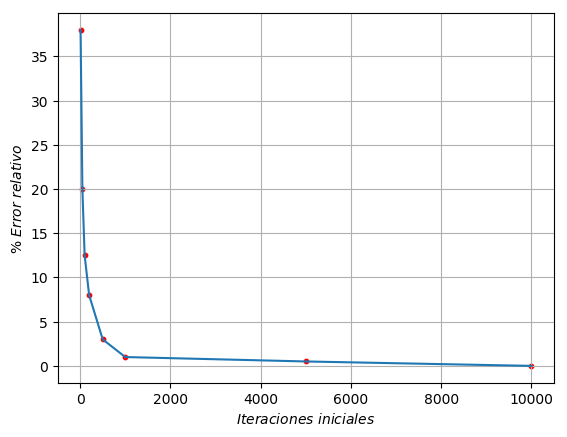

In [36]:
x=[10,50,100,200,500,1000,5000,10000]
y=[38,20,12.5,8,3,1,0.5,0.000001]

scatter(x,y,s=10, c="r")
plot(x,y)

grid("true")
#yticks(0:0.5:9)
xlabel(L"Iteraciones \ iniciales")
ylabel(L"\% \ Error \ relativo ")  
show()


Bifurcación inferior:

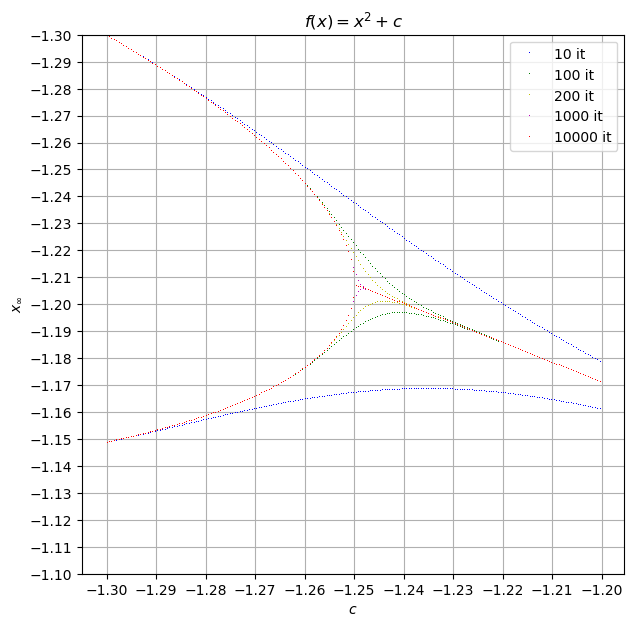

In [37]:
Qc(x,c) = x^2 + c

crange = -1.30:1/2^11:-1.20
ff = diag_bifurc(Qc, 10, 4, crange); 
ff1= diag_bifurc(Qc, 100, 4, crange);
ff2= diag_bifurc(Qc, 200, 4, crange);
ff3= diag_bifurc(Qc, 1000, 4, crange);
ff4= diag_bifurc(Qc, 10000, 4, crange);

cc = ones(size(ff4, 1)) * crange';

# Esto cambia las matrices en vectores; ayuda un poco para los dibujos
ff = reshape(ff, size(ff, 1)*size(ff, 2));
ff1 = reshape(ff1, size(ff1, 1)*size(ff1, 2));
ff2 = reshape(ff2, size(ff2, 1)*size(ff2, 2));
ff3 = reshape(ff3, size(ff3, 1)*size(ff3, 2));
ff4 = reshape(ff4, size(ff4, 1)*size(ff4, 2));


cc = reshape(cc, size(ff4));

figure(figsize=(7,7))
plot(cc,ff,"b,", label="10 it")
plot(cc,ff1,"g,", label="100 it")
plot(cc,ff2, "y,", label="200 it")
plot(cc,ff3, "m,",label="1000 it")
plot(cc,ff4, "r,",label="10000 it")

grid("True")
ylim(-1.10,-1.30)
xticks(-1.30:0.01:-1.20)
yticks(-1.10:-0.01:-1.3)
legend(loc=1)
xlabel(L"c")
ylabel(L"x_\infty")
title(L"f(x)=x^2+c")
show()

En este caso la bifurcación de doblamiento de periodo $2$ por lo que el mínimo de iteraciones de salida deben ser $4$. La propagación del error en la convergencia de los puntos de bifurcación con el mismo periodo es igual, ya que la propagación del error en la convergencia depende de número de iteraciones iniciales que se utilice con respecto al mínimo de iteraciones en la salida. 

Como último ejemplo, se exploró también la propagación del error en la convergencia del punto donde ocurre doblamiento de periodo cuatro: $c \approx -1.368...$.

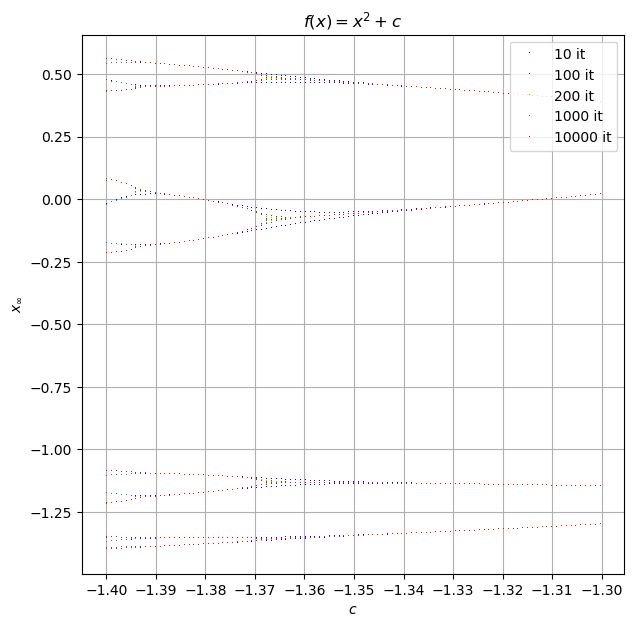

In [38]:
Qc(x,c) = x^2 + c

crange = -1.40:1/2^10:-1.30
ff = diag_bifurc(Qc, 10, 8, crange); 
ff1= diag_bifurc(Qc, 100, 8, crange);
ff2= diag_bifurc(Qc, 200, 8, crange);
ff3= diag_bifurc(Qc, 1000, 8, crange);
ff4= diag_bifurc(Qc, 10000, 8, crange);

cc = ones(size(ff, 1)) * crange';

# Esto cambia las matrices en vectores; ayuda un poco para los dibujos
ff = reshape(ff, size(ff, 1)*size(ff, 2));
ff1 = reshape(ff1, size(ff1, 1)*size(ff1, 2));
ff2 = reshape(ff2, size(ff2, 1)*size(ff2, 2));
ff3 = reshape(ff3, size(ff3, 1)*size(ff3, 2));
ff4 = reshape(ff4, size(ff4, 1)*size(ff4, 2));


cc = reshape(cc, size(ff));

figure(figsize=(7,7))
plot(cc,ff,"b,", label="10 it")
plot(cc,ff1,"g,", label="100 it")
plot(cc,ff2, "y,", label="200 it")
plot(cc,ff3, ",",label="1000 it")
plot(cc,ff4, "r,",label="10000 it")

grid("True")
xticks(-1.40:0.01:-1.30)
legend(loc=1)
xlabel(L"c")
ylabel(L"x_\infty")
title(L"f(x)=x^2+c")
show()

Bifurcación superior: 

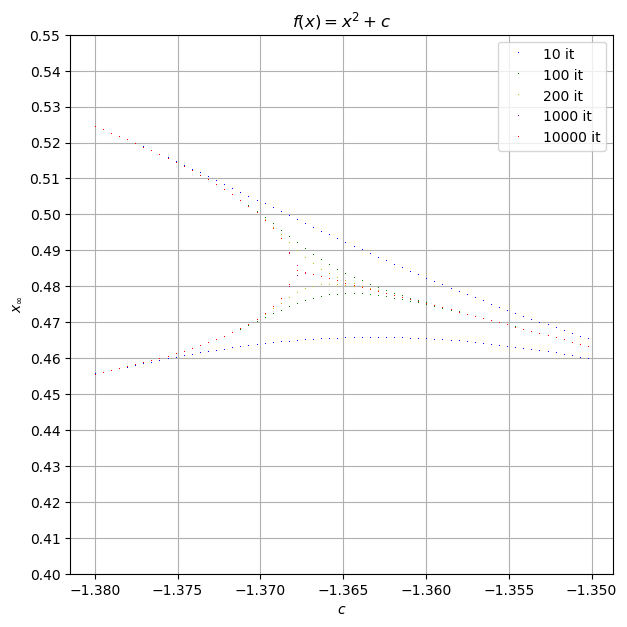

In [39]:
Qc(x,c) = x^2 + c

crange = -1.38:1/2^11:-1.35
ff = diag_bifurc(Qc, 10, 8, crange); 
ff1= diag_bifurc(Qc, 100, 8, crange);
ff2= diag_bifurc(Qc, 200, 8, crange);
ff3= diag_bifurc(Qc, 1000, 8, crange);
ff4= diag_bifurc(Qc, 10000, 8, crange);

cc = ones(size(ff4, 1)) * crange';

# Esto cambia las matrices en vectores; ayuda un poco para los dibujos
ff = reshape(ff, size(ff, 1)*size(ff, 2));
ff1 = reshape(ff1, size(ff1, 1)*size(ff1, 2));
ff2 = reshape(ff2, size(ff2, 1)*size(ff2, 2));
ff3 = reshape(ff3, size(ff3, 1)*size(ff3, 2));
ff4 = reshape(ff4, size(ff4, 1)*size(ff4, 2));


cc = reshape(cc, size(ff4));

figure(figsize=(7,7))
plot(cc,ff,"b,", label="10 it")
plot(cc,ff1,"g,", label="100 it")
plot(cc,ff2, "y,", label="200 it")
plot(cc,ff3, "m,",label="1000 it")
plot(cc,ff4, "r,",label="10000 it")

grid("True")
ylim(0.40,0.55)
xticks(-1.38:0.005:-1.35)
yticks(0.40:0.01:0.55)
legend(loc=1)
xlabel(L"c")
ylabel(L"x_\infty")
title(L"f(x)=x^2+c")
show()

Propagación del error en la convergencia de $c \approx -1.368$  :

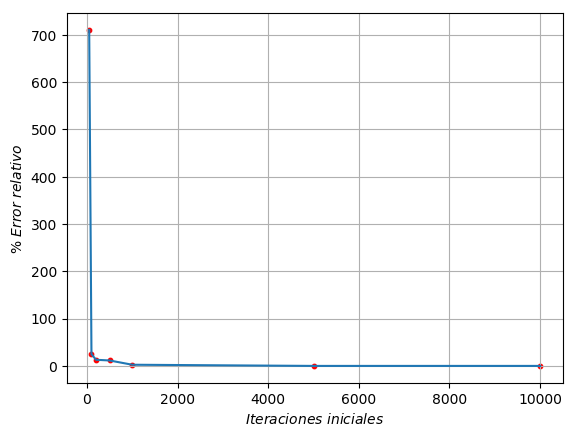

In [40]:
x=[50,100,200,500,1000,5000,10000]
y=[710,25,13,11.5,2.5,0.008,0.000008]

scatter(x,y,s=10, c="r")
plot(x,y)

grid("true")
xlabel(L"Iteraciones \ iniciales")
ylabel(L"\% \ Error \ relativo ")  
show()

Al comparar la gráfica de la propagación del error en la convergencia de los puntos de bifurcación de periodo 1, 2 y 4. Se puede observar que según vaya aumentando el periodo de la bifurcación, aumentará el número mínimo de iteraciones de salida, por lo que eso también va a contribuir a que el error numérico en la convergencia sea más grande cuando este número se encuentra cercano al de las iteraciones iniciales. Por otro lado, una vez que estos dos números tienen una diferencia significativa, la propagación del error será más pequeña conforme el periodo del punto de bifurcación sea mayor.

Al introducir un error sistemático de $a=1 \times 10 ^{-10}$ : 

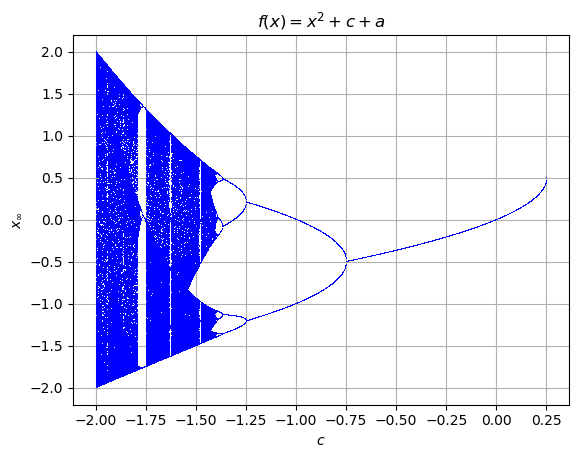

In [41]:
a=1.0*10.0-10
Qc(x,c) = x^2 + c
Qcsis(x,c) = x^2 + c + a

crange = 0.25:-1/2^10:-2.0
ff = diag_bifurc(Qc, 100000, 256, crange); 
cc = ones(size(ff, 1)) * crange';
ff = reshape(ff, size(ff, 1)*size(ff, 2));
cc = reshape(cc, size(ff));
plot(cc, ff, "r,")
ff = diag_bifurc(Qcsis, 100000, 256, crange); 
cc = ones(size(ff, 1)) * crange';
ff = reshape(ff, size(ff, 1)*size(ff, 2));
cc = reshape(cc, size(ff));
plot(cc, ff, "b,")
xticks(-2:0.25:0.25)
grid("True")
xlabel(L"c")
ylabel(L"x_\infty")
title(L"f(x)=x^2+c+a")
show()

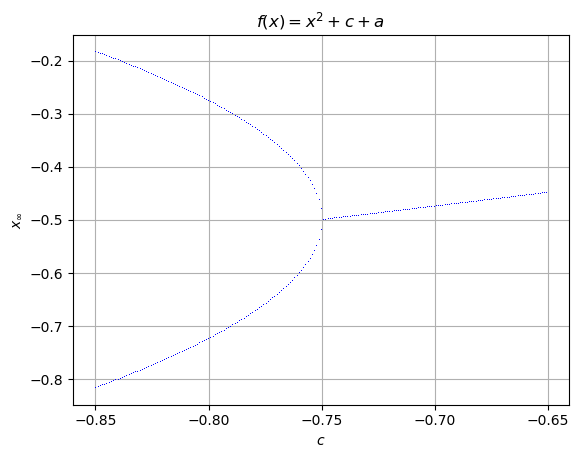

In [42]:
a=1.0*10.0-10

Qcsis(x,c) = x^2 + c + a

crange = -0.85:1/2^10:-0.65

ff = diag_bifurc(Qcsis, 10000, 256, crange); 
cc = ones(size(ff, 1)) * crange';

# Esto cambia las matrices en vectores; ayuda un poco para los dibujos
ff = reshape(ff, size(ff, 1)*size(ff, 2));
cc = reshape(cc, size(ff));
#figure(figsize=(6,4))
plot(cc, ff, "b,")
xticks(-0.85:0.05:-0.65)
grid("True")
xlabel(L"c")
ylabel(L"x_\infty")
title(L"f(x)=x^2+c+a")
show()

$a=1 \times 10 ^{-10}$

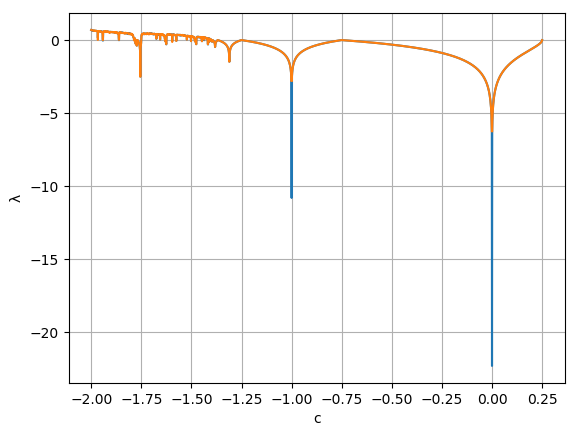

In [43]:
a=1.0*10.0^-10

Qcsis(x,c) = x^2 + c +a
dQcsis(x,c) = 2*x
Lyapunov(Qcsis,dQcsis,0.1,1000)
Qc(x,c) = x^2 + c
dQc(x,c) = 2*x
Lyapunov(Qc,dQcsis,0.1,1000)

$a=1 \times 10 ^{-20}$

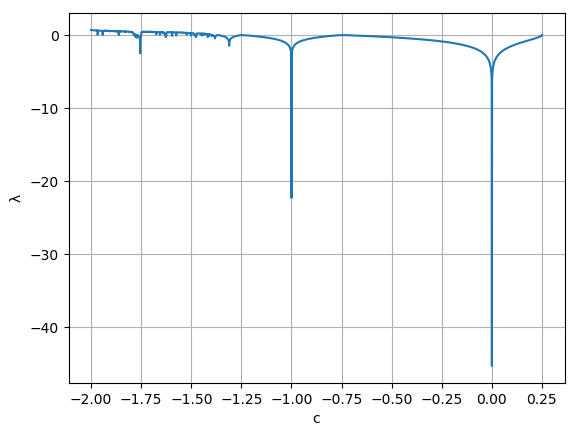

"a=1.0*10.0^-10\n\nQcsis(x,c) = x^2 + c +a\ndQcsis(x,c) = 2*x\nLyapunov(Qcsis,dQcsis,0.1,1000)\nQc(x,c) = x^2 + c\ndQc(x,c) = 2*x\nLyapunov(Qc,dQcsis,0.1,1000)\n"

In [44]:
a=1.0*10.0^-20

Qcsis(x,c) = x^2 + c + a
dQcsis(x,c) = 2*x
Lyapunov(Qcsis,dQcsis,0.1,1000)

"""
a=1.0*10.0^-10

Qcsis(x,c) = x^2 + c +a
dQcsis(x,c) = 2*x
Lyapunov(Qcsis,dQcsis,0.1,1000)
Qc(x,c) = x^2 + c
dQc(x,c) = 2*x
Lyapunov(Qc,dQcsis,0.1,1000)
"""

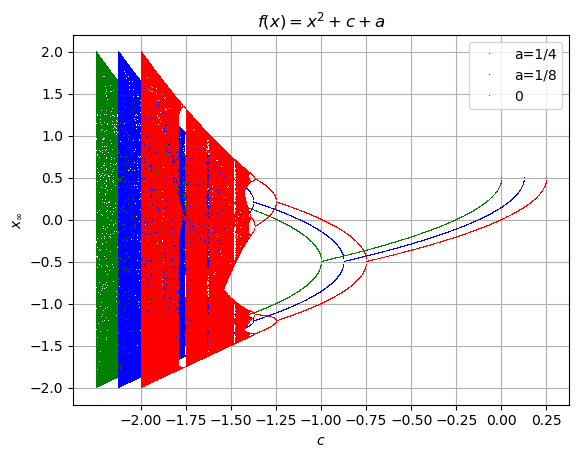

In [45]:
a=1/2^3

crange = 3:-1/2^10:-3.0

Qcsis(x,c) = x^2 + c + a

b=1/2^2

Qcsisb(x,c) = x^2 + c + b

ff = diag_bifurc(Qcsisb, 100000, 256, crange); 
cc = ones(size(ff, 1)) * crange';
ff = reshape(ff, size(ff, 1)*size(ff, 2));
cc = reshape(cc, size(ff));
plot(cc, ff, "g,",label="a=1/4")

ff = diag_bifurc(Qcsis, 100000, 256, crange); 
cc = ones(size(ff, 1)) * crange';
ff = reshape(ff, size(ff, 1)*size(ff, 2));
cc = reshape(cc, size(ff));
plot(cc, ff, "b,",label="a=1/8")
ff = diag_bifurc(Qc, 100000, 256, crange); 
cc = ones(size(ff, 1)) * crange';
ff = reshape(ff, size(ff, 1)*size(ff, 2));
cc = reshape(cc, size(ff));
plot(cc, ff, "r,",label="0")
legend(loc=1)
xticks(-2:0.25:0.25)
grid("on")
xlabel(L"c")
ylabel(L"x_\infty")
title(L"f(x)=x^2+c+a")
show()

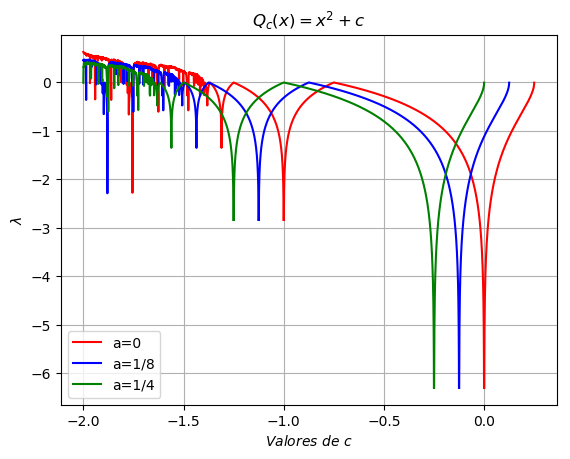

In [46]:
Qc(x,c) = x^2 + c
c_valores,L=Lyapunov1(Qc,0.1,1000,-2:1/2^11:0.25)
plot(c_valores,L,color="red",label="a=0")
grid(true)
xlabel(L"Valores \ de \ c")
ylabel(L"λ")
title(L"Q_c(x)=x^2+c")

Qcsis(x,c) = x^2 + c + a
c_valores,L=Lyapunov1(Qcsis,0.1,1000,-2:1/2^11:0.25)
plot(c_valores,L,color="blue",label="a=1/8")
grid(true)
xlabel(L"Valores \ de \ c")
ylabel(L"λ")
title(L"Q_c(x)=x^2+c")

Qcsisb(x,c) = x^2 + c + b
c_valores,L=Lyapunov1(Qcsisb,0.1,1000,-2:1/2^11:0.25)
plot(c_valores,L,color="green",label="a=1/4")
grid(true)
xlabel(L"Valores \ de \ c")
ylabel(L"λ")
title(L"Q_c(x)=x^2+c")

legend(loc=3)
show()

Explorando los diagramas de bifurcación y exponentes de Lyapunov tenemos dos resultados:

1. Agregar un error sistemático muy pequeño forza a la computadora a cambiar el tipo de dato a trabajar, extendiendo los dígitos antes de truncarlos. Se puede observar que la amplitud de los picos en los exponentes de Lyapunov se triplica; es decir, aquellos puntos donde se tiene un ciclo super estable los exponentes de Lyapunov se vuelven más negativos. Lo que significa que en estos puntos su estabilidad asintótica aumenta. Podemos extrapolar este resultado a que si pudiésemos trabajar con infinitas cifras, los puntos con ciclos superestables serían infinitamente estables, pues $\lambda \rightarrow \infty$

2. Para errores sistemáticos que no cambien la base en la que se trabajen sólo aplican un desplazamiento en el diagrama de bifurcación y a la imagen de los exponentes de Lyapunov, pues básicamente estamos trabajando con un mapeo diferente; $x^2+c'$

Ya a partir de estos, deberíamos explorar un poco los puntos de bifurcación; hacer histogramas sobre algunos valores de c (no sé si ya para todo el conjunto de últimos valores iterados, o específicamente para el último (puede depender del tipo de error que estudiemos), gráficas de la convergencia e intentar recalcular los exponentes de Lyapunov, y hacer algunos diagramas de órbita representativos; mostrar la trayectora de "referencia" contra la que tenga error.

Al introducir un error aleatorio:

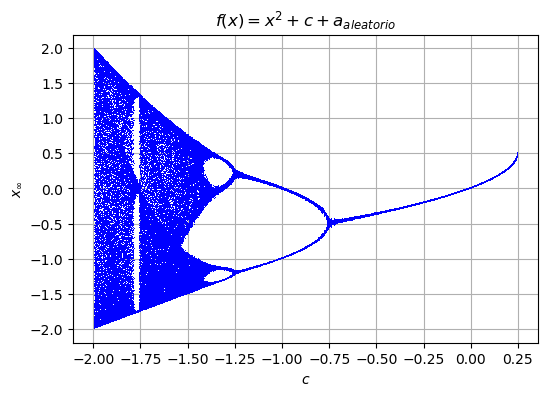

In [47]:
a=1.0*10.0^-2
Qcrand(x,c) = x^2 +c+a*rand()

crange = 0.25:-1/2^10:-2.0

ff = diag_bifurc(Qcrand, 100000, 128, crange); 
cc = ones(size(ff, 1)) * crange';
ff = reshape(ff, size(ff, 1)*size(ff, 2));
cc = reshape(cc, size(ff));
figure(figsize=(6,4))
plot(cc, ff, "b,")
grid("on")
xticks(-2:0.25:0.25)
xlabel(L"c")
ylabel(L"x_\infty")
title(L"f(x)=x^2+c+a_{aleatorio}")
show()

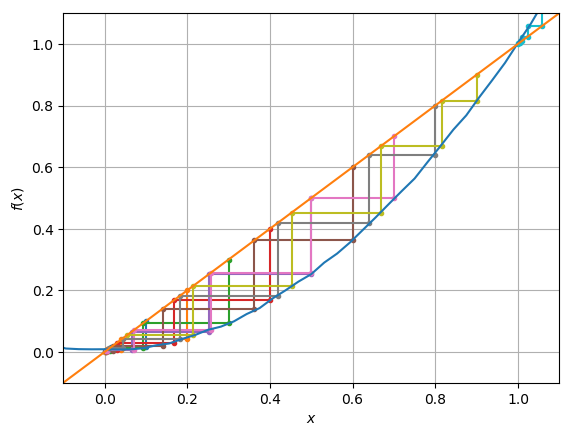

In [48]:
#Diagrama de orbitas
a=1.0*10.0^-2
Q0rand(x) = x^2+a*rand()

for i in 0.1:0.1:1
    aa, fa1 = iteramapeo(Q0rand,i,5)
    nn=size(aa,1)
    fa1[1]=aa[2]
    fa1=fa1[1:nn]
    plot(aa,fa1,marker=".")
end

xrange=-3:1/32:3
z=Q0rand.(xrange)
plot(xrange,z)
xlabel(L"x")
xlim(-0.1,1.1)
ylabel(L"f(x)")
ylim(-0.1,1.1)
grid(true)
plot(xrange, xrange)
show()

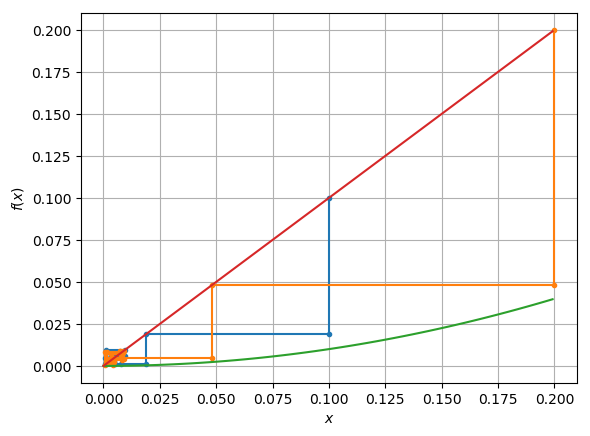

In [49]:
#Diagrama de orbitas
a=1.0*10.0^-2
Q0rand(x) = x^2+a*rand()
Qx(x)=x^2

for i in 0.1:0.1:0.2
    aa, fa1 = iteramapeo(Q0rand,i,15)
    nn=size(aa,1)
    fa1[1]=aa[2]
    fa1=fa1[1:nn]
    plot(aa,fa1,marker=".")
end

xrange=-0:1/2^8:0.20
z=Qx.(xrange)
plot(xrange,z)
xlabel(L"x")
#xlim(-3,3)
ylabel(L"f(x)")
#ylim(-3,3)
grid(true)
plot(xrange, xrange)
show()

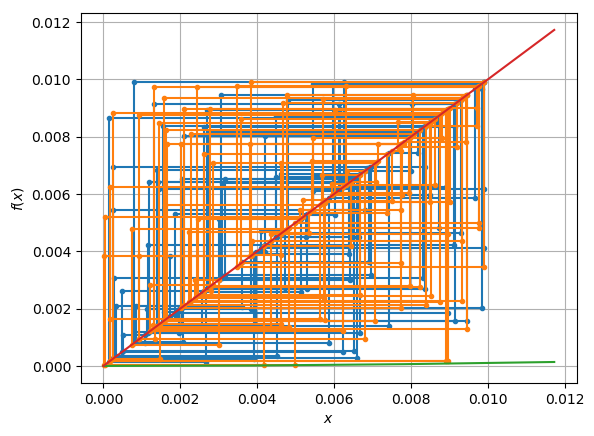

In [50]:
#Diagrama de orbitas
a=1.0*10.0^-2
Q0rand(x) = x^2+a*rand()
Qx(x)=x^2

for i in 0.1:0.1:0.2
    aa, fa1 = iteramapeo(Q0rand,i,1500)
    inicial=100*2
    nn=size(aa,1)
    fa1[1]=aa[2]
    aa=aa[nn-inicial:nn]
    fa1=fa1[nn-inicial:nn]
    plot(aa,fa1,marker=".")
end

xrange=-0:1/2^8:0.015
z=Qx.(xrange)
plot(xrange,z)
xlabel(L"x")
#xlim(-3,3)
ylabel(L"f(x)")
#ylim(-3,3)
grid(true)
plot(xrange, xrange)
show()

De los diagramas de órbita anteriores podemos apreciar cómo las primeras iteraciones acercan al mapeo al punto fijo. Sin embargo, ya estando cerca termina formando trayectorias aleatorias pero confinadas en una región.

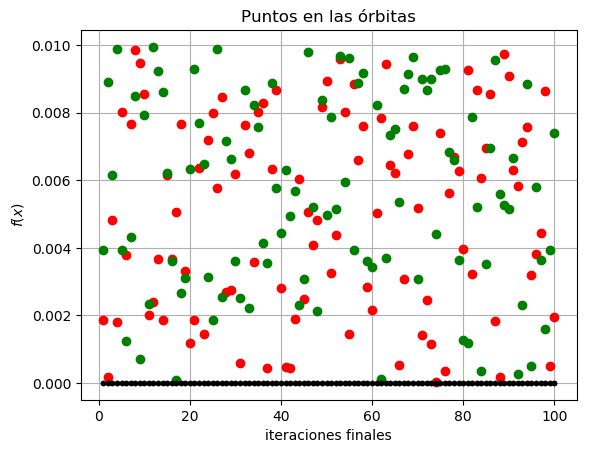

In [51]:
a=1.0*10.0^-2
Q0rand(x) = x^2+a*rand()
Qx(x)=x^2
#aa=[]
colores=["red","green","blue","yellow","pink"]
contador=0
for i in 0.1:0.1:0.2
    contador=contador+1
    aa, fa1 = iteramapeo(Q0rand,i,1500)
    inicial=100*2
    nn=size(aa,1)
    fa1[1]=aa[2]
    aa=aa[nn-inicial:nn]
    fa1=fa1[nn-inicial:nn]
    nrange=1:1:100
    colora=rand()
    colorb=rand()
    colorc=rand()
    for j in nrange
        plot(j,aa[j*2-1],marker="o",color=colores[contador])
    end
end

for i in 0.1:0.1:0.2
    contador=contador+1
    aa, fa1 = iteramapeo(Qx,i,1500)
    inicial=100*2
    nn=size(aa,1)
    fa1[1]=aa[2]
    aa=aa[nn-inicial:nn]
    fa1=fa1[nn-inicial:nn]
    nrange=1:1:100
    colora=rand()
    colorb=rand()
    colorc=rand()
    for j in nrange
        plot(j,aa[j*2-1],marker=".",color="black")
    end
end

"""
for i in nrange
    plot(i,aa[i*2-1],"bo")
end
"""
plot()
grid(true)
title("Puntos en las órbitas")
xlabel("iteraciones finales")
ylabel(L"f(x)")
show()

En esta gráfica mostramos que como el mapeo original es cuadrático, este error se propaga de forma que todas las iteraciones están confinadas en el intervalo para al valor aleatorio; y siempre positivo.

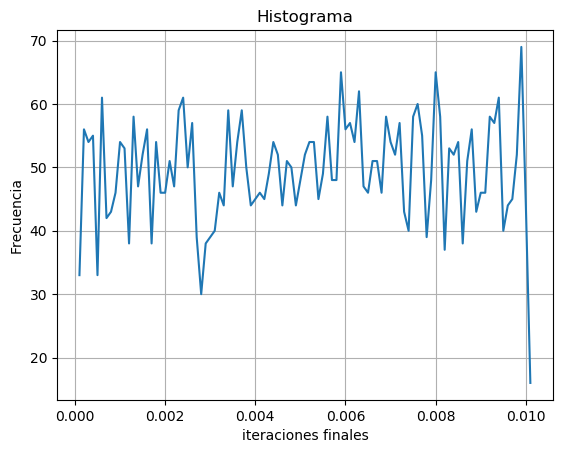

In [52]:
#Histograma
a=1.0*10.0^-2
Q0rand(x) = x^2+a*rand()
Qx(x)=x^2
aas=[]
colores=["red","green","blue","yellow","pink"]
contador=0
inicial=5000
nrange=1:1:inicial
for i in 0.1:0.1:0.2
    contador=contador+1
    aa2=[]
    aa, fa1 = iteramapeo(Q0rand,i,15000)
    nn=size(aa,1)
    fa1[1]=aa[2]
    aa=aa[nn-inicial*2:nn]
    fa1=fa1[nn-inicial*2:nn]
    colora=rand()
    colorb=rand()
    colorc=rand()
    for j in nrange
        push!(aa2,aa[j*2-1])
    end
    push!(aas,aa2)
end


promedios=[]
contador=0
aaas=copy(aas)

function Histograma_Propio(conjunto,min,max,diviciones)
    h=(max-min)/diviciones
    frecuencias=[]
    conjunto=sort(conjunto)
    conju=[]
    i=1
    tamaño=size(conjunto,1)
    while min<=max
        conteo=0
        min=min+h
        push!(conju,min)
        while (conjunto[i]<=min && i<=tamaño-1)
            i=i+1
            conteo=conteo+1
        end
        push!(frecuencias,conteo)
        
        
    end
    return conju,frecuencias
end

conju,frecu=Histograma_Propio(aas[1],0,0.01,100)

plot(conju,frecu)

title("Histograma")
xlabel("iteraciones finales")
ylabel("Frecuencia")
grid(true)
show()

Del histograma podemos notar que la distribución del error propagado sigue siendo completamente azaroso.

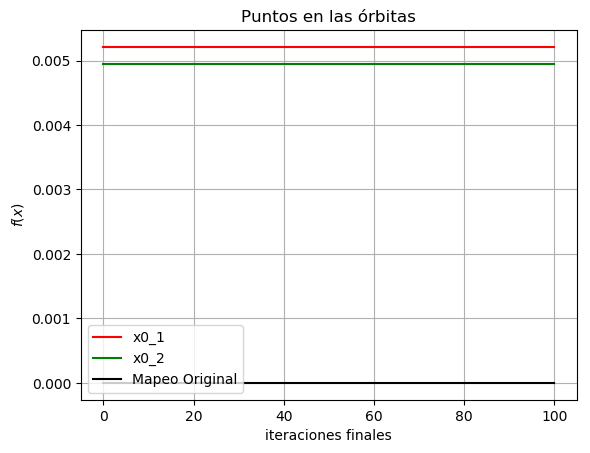

In [53]:
a=1.0*10.0^-2
Q0rand(x) = x^2+a*rand()
Qx(x)=x^2
aas=[]
colores=["red","green","blue","yellow","pink"]
contador=0
inicial=5000*2
for i in 0.1:0.1:0.2
    contador=contador+1
    aa2=[]
    aa, fa1 = iteramapeo(Q0rand,i,15000)
    nn=size(aa,1)
    fa1[1]=aa[2]
    aa=aa[nn-inicial:nn]
    fa1=fa1[nn-inicial:nn]
    nrange=1:1:100
    colora=rand()
    colorb=rand()
    colorc=rand()
    for j in nrange
        #plot(j,aa[j*2-1],marker="o",color=colores[contador])
        push!(aa2,aa[j*2-1])
    end
    push!(aas,aa2)
end


aaref=[]
for i in 0.1:0.1:0.2
    contador=contador+1
    aa, fa1 = iteramapeo(Qx,i,1500)
    inicial=100*2
    nn=size(aa,1)
    fa1[1]=aa[2]
    aa=aa[nn-inicial:nn]
    fa1=fa1[nn-inicial:nn]
    nrange=1:1:100
    colora=rand()
    colorb=rand()
    colorc=rand()
    for j in nrange
        push!(aaref,aa[j*2-1])
    end
end

promedios=[]
contador=0
for i in aas
    contador=contador+1
    promedio=sum(i)/size(i,1)
    push!(promedios,promedio)
    plot([0,100],[promedio,promedio],color=colores[contador],label="x0_"*string(contador))
end

plot([0,100],[0,0],color="black",label="Mapeo Original")
    
legend(loc=3)
grid(true)
title("Puntos en las órbitas")
xlabel("iteraciones finales")
ylabel(L"f(x)")
show()

La grafica anterior muestra los promedios de las últimas iteraciones con dos $x_0$ iniciales

Explorar en una órbita de periodo 4, y explorar en el caos

In [54]:
#Divergencia

//////A lo mejor aquí nos conviene repetir Qcrand unas 10 veces, mostrarlas todas, y mostrar los promedios de cada uno de las iteraciones finales que se guardan. Y/o mostrar en los diagramas de órbita cómo oscilan los puntos al rededor del punto fijo estable, e intentar asociar una incertidumbre al error.

Nuevamente, si introducimos un error de truncamiento para dos dígitos:

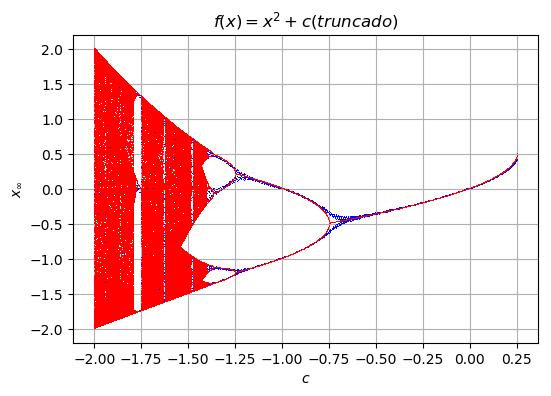

In [55]:
Qc(x,c) = x^2 + c
digitos=2         
function Qctrunc(x,c)
    return trunc((x^2+c)*10^digitos)*10.0^-digitos
end

crange = 0.25:-1/2^10:-2.0

ff = diag_bifurc(Qctrunc, 100000, 256, crange); 
cc = ones(size(ff, 1)) * crange';
ff = reshape(ff, size(ff, 1)*size(ff, 2));
cc = reshape(cc, size(ff));
figure(figsize=(6,4))
plot(cc, ff, "b,")

ff = diag_bifurc(Qc, 100000, 256, crange); 
cc = ones(size(ff, 1)) * crange';
ff = reshape(ff, size(ff, 1)*size(ff, 2));
cc = reshape(cc, size(ff));
plot(cc, ff, "r,")
grid("True")
xticks(-2:0.25:0.25)
xlabel(L"c")
ylabel(L"x_\infty")
title(L"f(x)=x^2+c (truncado)")
show()

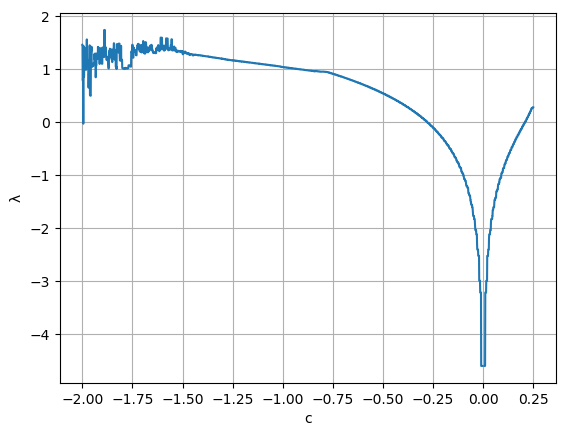

In [56]:
digitos=2
function Qctrunc(x,c)
    return trunc((x^2+c)*10^digitos)*10.0^-digitos
end

dQtrunc(x,c) = trunc(2*(x+c)*10^digitos)*10.0^-digitos
Lyapunov(Qctrunc,dQtrunc,0.1,1000)

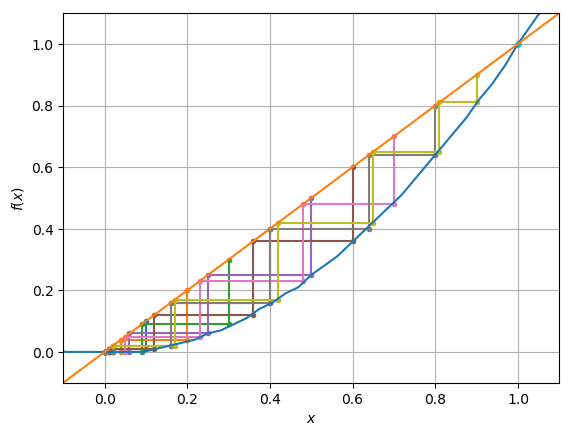

In [57]:
#Diagrama de orbitas

digitos=2
function Q0trunc(x)
    return trunc((x^2)*10^digitos)*10.0^-digitos
end

for i in 0.1:0.1:1
    aa, fa1 = iteramapeo(Q0trunc,i,5)
    nn=size(aa,1)
    fa1[1]=aa[2]
    fa1=fa1[1:nn]
    plot(aa,fa1,marker=".")
end

xrange=-3:1/32:3
z=Q0trunc.(xrange)
plot(xrange,z)
xlabel(L"x")
xlim(-0.1,1.1)
ylabel(L"f(x)")
ylim(-0.1,1.1)
grid(true)
plot(xrange, xrange)
show()

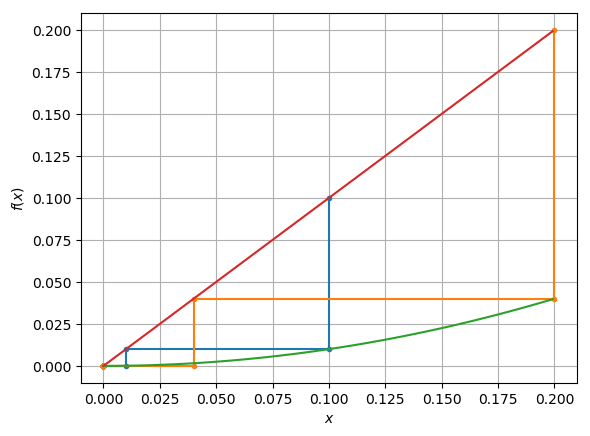

In [58]:
#Diagrama de orbitas
digitos=2
function Q0trunc(x)
    return trunc((x^2)*10^digitos)*10.0^-digitos
end
Qx(x)=x^2

for i in 0.1:0.1:0.2
    aa, fa1 = iteramapeo(Q0trunc,i,15)
    nn=size(aa,1)
    fa1[1]=aa[2]
    fa1=fa1[1:nn]
    plot(aa,fa1,marker=".")
end

xrange=-0:1/2^8:0.20
z=Qx.(xrange)
plot(xrange,z)
xlabel(L"x")
#xlim(-3,3)
ylabel(L"f(x)")
#ylim(-3,3)
grid(true)
plot(xrange, xrange)
show()

En el ciclo superestable no hay error en el sistema, pues el $0 \in \{ \mathbb{Z}*10^{-digitos} \} \forall digitos \in \mathbb{N}$

Revisaremos la dinámica en c=0.7

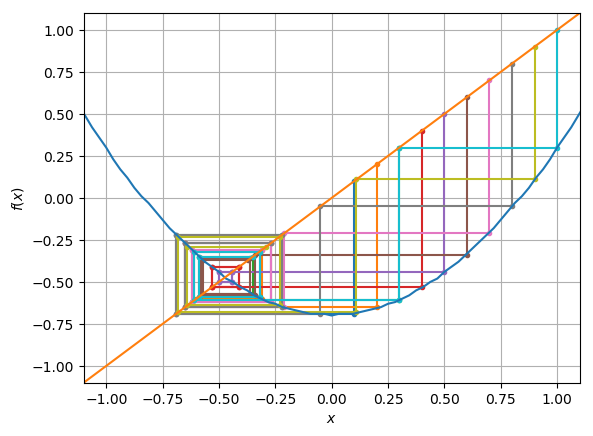

In [63]:
#Diagrama de orbitas

digitos=2
function Q7trunc(x)
    return trunc((x^2-0.7)*10^digitos)*10.0^-digitos
end

for i in 0.1:0.1:1
    aa, fa1 = iteramapeo(Q7trunc,i,5)
    nn=size(aa,1)
    fa1[1]=aa[2]
    fa1=fa1[1:nn]
    plot(aa,fa1,marker=".")
end

xrange=-3:1/32:3
z=Q7trunc.(xrange)
plot(xrange,z)
xlabel(L"x")
xlim(-1.1,1.1)
ylabel(L"f(x)")
ylim(-1.1,1.1)
grid(true)
plot(xrange, xrange)
show()

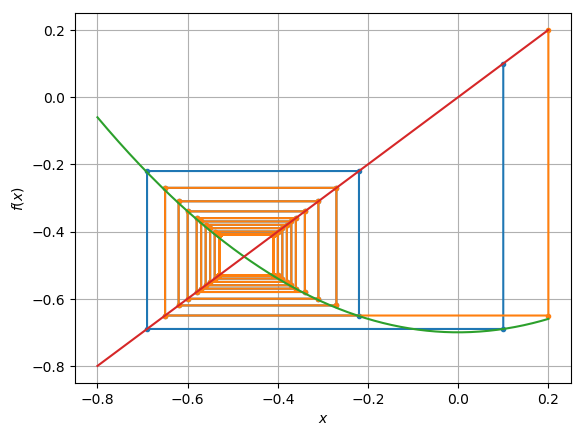

In [73]:
#Diagrama de orbitas
digitos=2
function Q7trunc(x)
    return trunc((x^2-0.7)*10^digitos)*10.0^-digitos
end
Q7x(x)=x^2-0.7

for i in 0.1:0.1:0.2
    aa, fa1 = iteramapeo(Q7trunc,i,5000)
    nn=size(aa,1)
    fa1[1]=aa[2]
    fa1=fa1[1:nn]
    plot(aa,fa1,marker=".")
end

xrange=-0.8:1/2^8:0.2
z=Q7x.(xrange)
plot(xrange,z)
xlabel(L"x")
#xlim(-3,3)
ylabel(L"f(x)")
#ylim(-3,3)
grid(true)
plot(xrange, xrange)
show()

Vemos que sin importar cuántas iteraciones se hagan, las iteraciones sólo oscilarán al rededor del punto en que el mapeo original tendría su punto fijo.

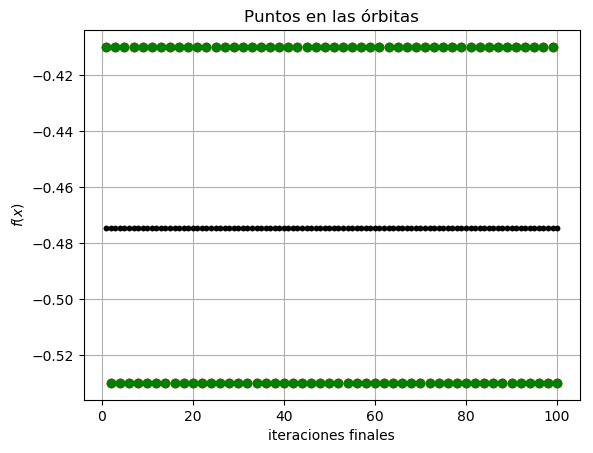

In [75]:
digitos=2
function Q7trunc(x)
    return trunc((x^2-0.7)*10^digitos)*10.0^-digitos
end
Q7x(x)=x^2-0.7
colores=["red","green","blue","yellow","pink"]
contador=0
for i in 0.1:0.1:0.2
    contador=contador+1
    aa, fa1 = iteramapeo(Q7trunc,i,1500)
    inicial=100*2
    nn=size(aa,1)
    fa1[1]=aa[2]
    aa=aa[nn-inicial:nn]
    fa1=fa1[nn-inicial:nn]
    nrange=1:1:100
    colora=rand()
    colorb=rand()
    colorc=rand()
    for j in nrange
        plot(j,aa[j*2-1],marker="o",color=colores[contador])
    end
end

for i in 0.1:0.1:0.2
    contador=contador+1
    aa, fa1 = iteramapeo(Q7x,i,1500)
    inicial=100*2
    nn=size(aa,1)
    fa1[1]=aa[2]
    aa=aa[nn-inicial:nn]
    fa1=fa1[nn-inicial:nn]
    nrange=1:1:100
    colora=rand()
    colorb=rand()
    colorc=rand()
    for j in nrange
        plot(j,aa[j*2-1],marker=".",color="black")
    end
end

"""
for i in nrange
    plot(i,aa[i*2-1],"bo")
end
"""
plot()
grid(true)
title("Puntos en las órbitas")
xlabel("iteraciones finales")
ylabel(L"f(x)")
show()

Podemos apreciar que la dinámica del sistema es completamente diferente a la original o a la obtenida con un error aleatorio; pues truncar las cifras se asemeja a componer el mapeo con módulos.

In [ ]:
#Histograma

Fijándonos en el histograma sabemos que tenemos algo más de certeza sobre la propagación del error de estas funciones

Aquí podríamos repetirlo para varios dígitos de truncamiento; y checar porque, creo que trunca sólo quitando el último dígito, podríamos probar con (floor(x+1)+floor(x))/2 para que sea el redondeo.

Se me ocurre que quizá podríamos decir algo acerca de los puntos fijos inestables y el tipo de error y que además hacen que sean difíciles de localizar. O no sé, se me ocurrió de repente. 

Podríamos agregar un error gaussiano; pero no siento que con el aleatorio basta.

Agregar otro mapeo quizá, y el repetir todo. 

Concluir algo de la fiabilidad de los métodos numérocs y quizá poner un ejemplo.